In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# NEW DATASET

In [2]:
cleaned_twitter_final_data = pd.read_csv('../raw_data/cleaned_twitter_final_data.csv', encoding='latin1')
cleaned_twitter_final_data

,Target,Id,Time_Tweet,NO_QUERY,User,Tweet,clean_text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,upset ca nt update facebook texting might cry...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,dive many time ball manage save rest go bound
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,whole body feel itchy like fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",s behave m mad ca nt see
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew,whole crew
...,...,...,...,...,...,...,...
1599994,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...,wake school best feel ever
1599995,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...,thewdbcom cool hear old walt interview httpbli...
1599996,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...,ready mojo makeover ask detail
1599997,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...,happy th birthday boo al time tupac amaru shakur


In [3]:
cleaned_twitter_final_data[cleaned_twitter_final_data['clean_text'].isnull()]

,Target,Id,Time_Tweet,NO_QUERY,User,Tweet,clean_text
207,0,1467863072,Mon Apr 06 22:33:25 PDT 2009,NO_QUERY,Artiel87,@mandayyy,NaN
248,0,1467874569,Mon Apr 06 22:36:27 PDT 2009,NO_QUERY,Artiel87,@mandayyy,NaN
397,0,1467912842,Mon Apr 06 22:46:53 PDT 2009,NO_QUERY,KimberlyKane,@danadearmond,NaN
429,0,1467919452,Mon Apr 06 22:48:48 PDT 2009,NO_QUERY,jtmal0723,@anistorm,NaN
554,0,1467950866,Mon Apr 06 22:57:47 PDT 2009,NO_QUERY,melbrehl,@phlaimeaux where are you?,NaN
...,...,...,...,...,...,...,...
1598920,4,2193305981,Tue Jun 16 08:16:39 PDT 2009,NO_QUERY,Jsstar0273,If only?,NaN
1599493,4,2193453573,Tue Jun 16 08:28:48 PDT 2009,NO_QUERY,RobNice24,@Sworn4DaBosses,NaN
1599551,4,2193475408,Tue Jun 16 08:30:32 PDT 2009,NO_QUERY,SamNiley11,@francii_ me too,NaN
1599810,4,2193550913,Tue Jun 16 08:36:39 PDT 2009,NO_QUERY,handriani,to be with you,NaN


In [4]:
cleaned_twitter_final_data.dropna(subset=['clean_text'], inplace=True)

In [5]:
cleaned_twitter_final_data['tweet_len'] = cleaned_twitter_final_data['Tweet'].str.len()

In [6]:
cleaned_twitter_final_data['clean_len'] = cleaned_twitter_final_data['clean_text'].str.len()

In [7]:
cleaned_twitter_final_data.drop(columns=['Target', 'Time_Tweet', 'NO_QUERY', 'User'], inplace=True)

In [8]:
cleaned_twitter_final_data

,Id,Tweet,clean_text,tweet_len,clean_len
0,1467810672,is upset that he can't update his Facebook by ...,upset ca nt update facebook texting might cry...,111,76
1,1467810917,@Kenichan I dived many times for the ball. Man...,dive many time ball manage save rest go bound,89,45
2,1467811184,my whole body feels itchy and like its on fire,whole body feel itchy like fire,47,31
3,1467811193,"@nationwideclass no, it's not behaving at all....",s behave m mad ca nt see,111,24
4,1467811372,@Kwesidei not the whole crew,whole crew,29,10
...,...,...,...,...,...
1599994,2193601966,Just woke up. Having no school is the best fee...,wake school best feel ever,56,26
1599995,2193601969,TheWDB.com - Very cool to hear old Walt interv...,thewdbcom cool hear old walt interview httpbli...,81,53
1599996,2193601991,Are you ready for your MoJo Makeover? Ask me f...,ready mojo makeover ask detail,57,30
1599997,2193602064,Happy 38th Birthday to my boo of alll time!!! ...,happy th birthday boo al time tupac amaru shakur,65,48


In [9]:
cleaned_twitter_final_data = cleaned_twitter_final_data[cleaned_twitter_final_data['tweet_len'] >= 70]

In [10]:
cleaned_twitter_final_data

,Id,Tweet,clean_text,tweet_len,clean_len
0,1467810672,is upset that he can't update his Facebook by ...,upset ca nt update facebook texting might cry...,111,76
1,1467810917,@Kenichan I dived many times for the ball. Man...,dive many time ball manage save rest go bound,89,45
3,1467811193,"@nationwideclass no, it's not behaving at all....",s behave m mad ca nt see,111,24
6,1467811594,@LOLTrish hey long time no see! Yes.. Rains a...,hey long time see yes rain bite bite lol m fi...,99,56
11,1467812723,@caregiving I couldn't bear to watch it. And ...,could nt bear watch think ua loss embarrass,94,43
...,...,...,...,...,...
1599986,2193579092,@La_r_a NEVEER I think that you both will get...,neveer think get well,73,22
1599987,2193579191,@Roy_Everitt ha- good job. that's right - we g...,ha good job s right get ta throw bigrun tag ev...,125,77
1599990,2193579284,@rmedina @LaTati Mmmm That sounds absolutely ...,m sound absolutely perfect schedule full wo n...,133,71
1599993,2193579489,"@Cliff_Forster Yeah, that does work better tha...",yeah work better wait end wonder time keep goo...,132,52


In [11]:
cleaned_twitter_final_data = cleaned_twitter_final_data[cleaned_twitter_final_data['tweet_len'] <= 140]

In [12]:
cleaned_twitter_final_data[cleaned_twitter_final_data['tweet_len'] > 140].count()

Id            0
Tweet         0
clean_text    0
tweet_len     0
clean_len     0
dtype: int64

In [13]:
cleaned_twitter_final_data.reset_index(inplace=True)

In [14]:
cleaned_twitter_final_data

,index,Id,Tweet,clean_text,tweet_len,clean_len
0,0,1467810672,is upset that he can't update his Facebook by ...,upset ca nt update facebook texting might cry...,111,76
1,1,1467810917,@Kenichan I dived many times for the ball. Man...,dive many time ball manage save rest go bound,89,45
2,3,1467811193,"@nationwideclass no, it's not behaving at all....",s behave m mad ca nt see,111,24
3,6,1467811594,@LOLTrish hey long time no see! Yes.. Rains a...,hey long time see yes rain bite bite lol m fi...,99,56
4,11,1467812723,@caregiving I couldn't bear to watch it. And ...,could nt bear watch think ua loss embarrass,94,43
...,...,...,...,...,...,...
778079,1599986,2193579092,@La_r_a NEVEER I think that you both will get...,neveer think get well,73,22
778080,1599987,2193579191,@Roy_Everitt ha- good job. that's right - we g...,ha good job s right get ta throw bigrun tag ev...,125,77
778081,1599990,2193579284,@rmedina @LaTati Mmmm That sounds absolutely ...,m sound absolutely perfect schedule full wo n...,133,71
778082,1599993,2193579489,"@Cliff_Forster Yeah, that does work better tha...",yeah work better wait end wonder time keep goo...,132,52


# VISUALIZING WORD DISPERSION

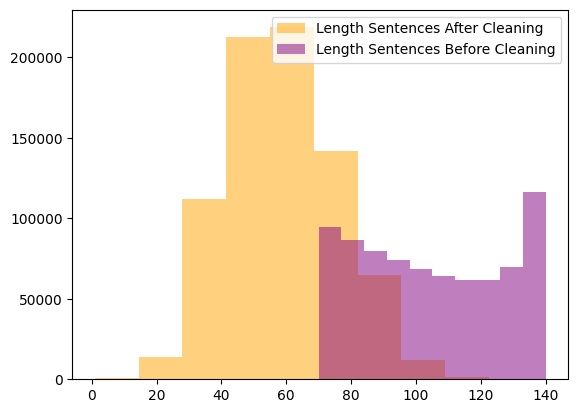

In [15]:
plt.hist(cleaned_twitter_final_data.clean_len, label='Length Sentences After Cleaning', alpha=0.5, color='orange')
plt.hist(cleaned_twitter_final_data.tweet_len, label='Length Sentences Before Cleaning', alpha=0.5, color='purple')
plt.legend()
plt.show();

## VIEW WORD COUNT

In [16]:
from collections import Counter

#tokenize every sentence meaning every row in the dataframe
tokenized_sentences = cleaned_twitter_final_data.clean_text.apply(lambda x: x.split())

#tokenize every word in every sentence - every word not unique
tokenized_words = [word for tokens in tokenized_sentences for word in tokens]

In [17]:
tokenized_words

['upset',
 'ca',
 'nt',
 'update',
 'facebook',
 'texting',
 'might',
 'cry',
 'result',
 'school',
 'today',
 'also',
 'blah',
 'dive',
 'many',
 'time',
 'ball',
 'manage',
 'save',
 'rest',
 'go',
 'bound',
 's',
 'behave',
 'm',
 'mad',
 'ca',
 'nt',
 'see',
 'hey',
 'long',
 'time',
 'see',
 'yes',
 'rain',
 'bite',
 'bite',
 'lol',
 'm',
 'fine',
 'thank',
 's',
 'could',
 'nt',
 'bear',
 'watch',
 'think',
 'ua',
 'loss',
 'embarrass',
 'count',
 'idk',
 'either',
 'never',
 'talk',
 'anymore',
 'would',
 've',
 'first',
 'nt',
 'gun',
 'really',
 'though',
 'zac',
 'snyder',
 's',
 'doucheclown',
 'wish',
 'get',
 'watch',
 'miss',
 'premiere',
 'hollis',
 'death',
 'scene',
 'hurt',
 'severely',
 'watch',
 'film',
 'wry',
 'director',
 'cut',
 'oh',
 'dear',
 'drink',
 'forget',
 'table',
 'drink',
 'one',
 'friend',
 'call',
 'ask',
 'meet',
 'mid',
 'valley',
 'today',
 've',
 'time',
 'sigh',
 'oh',
 'lol',
 'leslie',
 'ok',
 'wo',
 'nt',
 'leslie',
 'wo',
 'nt',
 'get',
 '

In [18]:
len(tokenized_words)

8148094

In [19]:
#create word cloud method

def cloud_string(tokenized_words, batch_size=100):
    
    comment_words = ''

    total_processed = 0

    for i in range(0, len(tokenized_words), batch_size):
        start = i
        end = min(i + batch_size, len(tokenized_words))
        batch_data = tokenized_words[start:end]

        comment_words += ' '.join(batch_data)+' '

        total_processed += len(batch_data)

        if total_processed >= 1_000_000:
            print(f"✅ Processed {total_processed} words")
    
    print("🥳 string with words completed.")
    return comment_words

In [20]:
word_cloud_string = cloud_string(tokenized_words, batch_size=10000)

✅ Processed 1000000 words
✅ Processed 1010000 words
✅ Processed 1020000 words
✅ Processed 1030000 words
✅ Processed 1040000 words
✅ Processed 1050000 words
✅ Processed 1060000 words
✅ Processed 1070000 words
✅ Processed 1080000 words
✅ Processed 1090000 words
✅ Processed 1100000 words
✅ Processed 1110000 words
✅ Processed 1120000 words
✅ Processed 1130000 words
✅ Processed 1140000 words
✅ Processed 1150000 words
✅ Processed 1160000 words
✅ Processed 1170000 words
✅ Processed 1180000 words
✅ Processed 1190000 words
✅ Processed 1200000 words
✅ Processed 1210000 words
✅ Processed 1220000 words
✅ Processed 1230000 words
✅ Processed 1240000 words
✅ Processed 1250000 words
✅ Processed 1260000 words
✅ Processed 1270000 words
✅ Processed 1280000 words
✅ Processed 1290000 words
✅ Processed 1300000 words
✅ Processed 1310000 words
✅ Processed 1320000 words
✅ Processed 1330000 words
✅ Processed 1340000 words
✅ Processed 1350000 words
✅ Processed 1360000 words
✅ Processed 1370000 words
✅ Processed 

In [22]:
from wordcloud import WordCloud

wordcloud = WordCloud(width = 500, height = 500,
                background_color ='white',
                min_font_size = 10).generate(word_cloud_string)

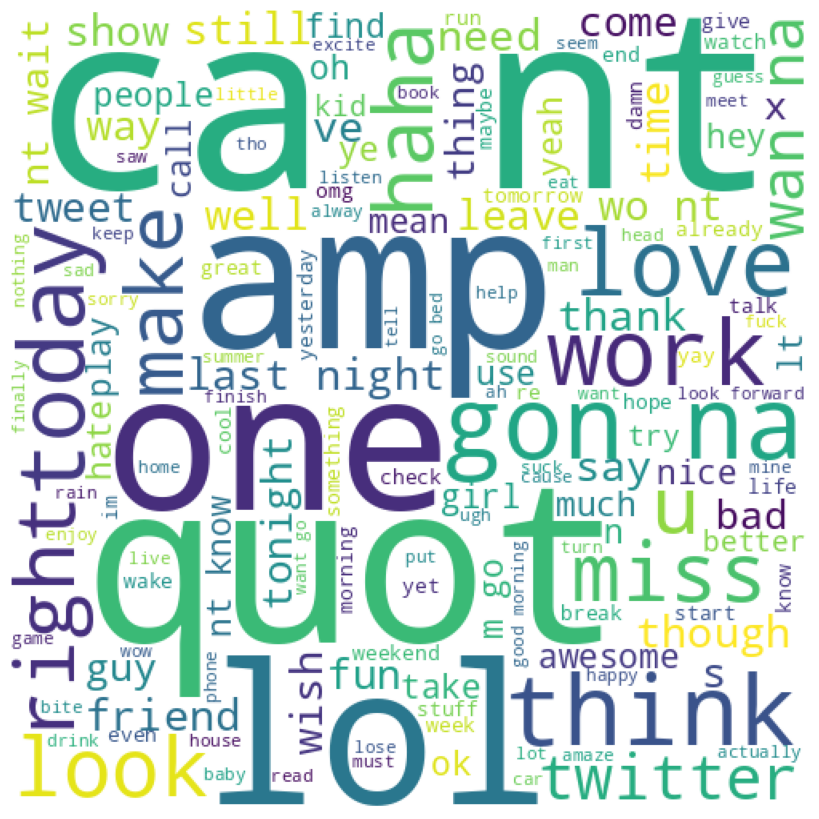

In [23]:
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [24]:
import nltk
from nltk.corpus import stopwords
 
nltk.download('stopwords')
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/diogofreitas/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
#count ocurrence of each unique word
unique_word_count = Counter(tokenized_words)
unique_word_count

Counter({'get': 130185,
         's': 125434,
         'nt': 123953,
         'go': 108847,
         'm': 92583,
         'day': 67983,
         'like': 59658,
         'good': 54979,
         'work': 51891,
         'u': 49847,
         'love': 48913,
         'time': 46549,
         'think': 46158,
         'know': 42810,
         'quot': 42473,
         'today': 42368,
         'one': 41650,
         'see': 41092,
         'make': 40630,
         'lol': 40040,
         'back': 36584,
         'want': 36049,
         'really': 34372,
         'im': 32272,
         'come': 31837,
         'miss': 31598,
         'feel': 31329,
         'ca': 31275,
         'thank': 31244,
         'amp': 31000,
         'll': 30460,
         'night': 29983,
         'well': 29935,
         'need': 29685,
         'still': 29587,
         'look': 29300,
         'na': 27847,
         'new': 27752,
         'watch': 27504,
         'oh': 26635,
         'much': 26085,
         'last': 25993,
         '

# FULL DATASET (JUST TAKING NULL VALUES)

# SECOND WAVE OF CLEANING DATA

First inspect the entire dataframe and not remove sentences below 70 characters and above 140 and see WordCloud

## CLEAN ENTIRE DATASET

In [26]:
full_dataset = pd.read_csv('../raw_data/cleaned_twitter_final_data.csv', encoding='latin1')
full_dataset

,Target,Id,Time_Tweet,NO_QUERY,User,Tweet,clean_text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,upset ca nt update facebook texting might cry...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,dive many time ball manage save rest go bound
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,whole body feel itchy like fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",s behave m mad ca nt see
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew,whole crew
...,...,...,...,...,...,...,...
1599994,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...,wake school best feel ever
1599995,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...,thewdbcom cool hear old walt interview httpbli...
1599996,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...,ready mojo makeover ask detail
1599997,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...,happy th birthday boo al time tupac amaru shakur


In [27]:
full_dataset['tweet_len'] = full_dataset['Tweet'].str.len()
full_dataset['clean_len'] = full_dataset['clean_text'].str.len()

In [28]:
full_dataset[full_dataset['clean_text'].isnull()]

,Target,Id,Time_Tweet,NO_QUERY,User,Tweet,clean_text,tweet_len,clean_len
207,0,1467863072,Mon Apr 06 22:33:25 PDT 2009,NO_QUERY,Artiel87,@mandayyy,NaN,10,NaN
248,0,1467874569,Mon Apr 06 22:36:27 PDT 2009,NO_QUERY,Artiel87,@mandayyy,NaN,12,NaN
397,0,1467912842,Mon Apr 06 22:46:53 PDT 2009,NO_QUERY,KimberlyKane,@danadearmond,NaN,14,NaN
429,0,1467919452,Mon Apr 06 22:48:48 PDT 2009,NO_QUERY,jtmal0723,@anistorm,NaN,10,NaN
554,0,1467950866,Mon Apr 06 22:57:47 PDT 2009,NO_QUERY,melbrehl,@phlaimeaux where are you?,NaN,27,NaN
...,...,...,...,...,...,...,...,...,...
1598920,4,2193305981,Tue Jun 16 08:16:39 PDT 2009,NO_QUERY,Jsstar0273,If only?,NaN,9,NaN
1599493,4,2193453573,Tue Jun 16 08:28:48 PDT 2009,NO_QUERY,RobNice24,@Sworn4DaBosses,NaN,16,NaN
1599551,4,2193475408,Tue Jun 16 08:30:32 PDT 2009,NO_QUERY,SamNiley11,@francii_ me too,NaN,17,NaN
1599810,4,2193550913,Tue Jun 16 08:36:39 PDT 2009,NO_QUERY,handriani,to be with you,NaN,15,NaN


In [29]:
#drop NAs
full_dataset.dropna(subset=['clean_text'], inplace=True)

In [30]:
full_dataset

,Target,Id,Time_Tweet,NO_QUERY,User,Tweet,clean_text,tweet_len,clean_len
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,upset ca nt update facebook texting might cry...,111,76.0
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,dive many time ball manage save rest go bound,89,45.0
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,whole body feel itchy like fire,47,31.0
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",s behave m mad ca nt see,111,24.0
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew,whole crew,29,10.0
...,...,...,...,...,...,...,...,...,...
1599994,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...,wake school best feel ever,56,26.0
1599995,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...,thewdbcom cool hear old walt interview httpbli...,81,53.0
1599996,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...,ready mojo makeover ask detail,57,30.0
1599997,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...,happy th birthday boo al time tupac amaru shakur,65,48.0


## Visualize Sentence Dispersion

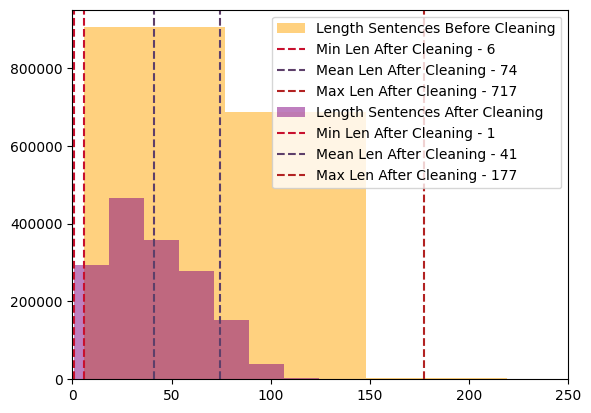

In [31]:
#data before cleaning 
plt.hist(full_dataset.tweet_len, label='Length Sentences Before Cleaning', alpha=0.5, color='orange')
plt.axvline(min(full_dataset.tweet_len), label=f'Min Len After Cleaning - {round(np.min(full_dataset.tweet_len))}', color='#C8102E', linestyle='--')
plt.axvline(np.mean(full_dataset.tweet_len), label=f'Mean Len After Cleaning - {round(np.mean(full_dataset.tweet_len))}', color='#5D3F6A', linestyle='--')
plt.axvline(max(full_dataset.tweet_len), label=f'Max Len After Cleaning - {round(np.max(full_dataset.tweet_len))}', color='#B22222', linestyle='--')


#data after cleaning
plt.hist(full_dataset.clean_len, label='Length Sentences After Cleaning', alpha=0.5, color='purple')
plt.axvline(min(full_dataset.clean_len), label=f'Min Len After Cleaning - {round(np.min(full_dataset.clean_len))}', color='#C8102E', linestyle='--')
plt.axvline(np.mean(full_dataset.clean_len), label=f'Mean Len After Cleaning - {round(np.mean(full_dataset.clean_len))}', color='#5D3F6A', linestyle='--')
plt.axvline(max(full_dataset.clean_len), label=f'Max Len After Cleaning - {round(np.max(full_dataset.clean_len))}', color='#B22222', linestyle='--')


plt.xlim(0, 250)
plt.legend()
plt.show();

## VIEW WORD COUNT


In [32]:
type(full_dataset.clean_text)

pandas.core.series.Series

In [33]:
from collections import Counter

#tokenize every sentence meaning every row in the dataframe
full_tokenized_sentences = full_dataset.clean_text.apply(lambda x: x.split())

#tokenize every word in every sentence - every word not unique
full_tokenized_words = [word for tokens in full_tokenized_sentences for word in tokens]

In [34]:
def cloud_string(tokenized_words, batch_size=100):
    
    comment_words = ''

    total_processed = 0

    for i in range(0, len(tokenized_words), batch_size):
        start = i
        end = min(i + batch_size, len(tokenized_words))
        batch_data = tokenized_words[start:end]

        comment_words += ' '.join(batch_data)+' '

        total_processed += len(batch_data)

        if total_processed >= 1_000_000:
            print(f"✅ Processed {total_processed} words")
    
    print("🥳 string with words completed.")
    return comment_words

In [35]:
word_cloud_string = cloud_string(full_tokenized_words, batch_size=10000)

✅ Processed 1000000 words
✅ Processed 1010000 words
✅ Processed 1020000 words
✅ Processed 1030000 words
✅ Processed 1040000 words
✅ Processed 1050000 words
✅ Processed 1060000 words
✅ Processed 1070000 words
✅ Processed 1080000 words
✅ Processed 1090000 words
✅ Processed 1100000 words
✅ Processed 1110000 words
✅ Processed 1120000 words
✅ Processed 1130000 words
✅ Processed 1140000 words
✅ Processed 1150000 words
✅ Processed 1160000 words
✅ Processed 1170000 words
✅ Processed 1180000 words
✅ Processed 1190000 words
✅ Processed 1200000 words
✅ Processed 1210000 words
✅ Processed 1220000 words
✅ Processed 1230000 words
✅ Processed 1240000 words
✅ Processed 1250000 words
✅ Processed 1260000 words
✅ Processed 1270000 words
✅ Processed 1280000 words
✅ Processed 1290000 words
✅ Processed 1300000 words
✅ Processed 1310000 words
✅ Processed 1320000 words
✅ Processed 1330000 words
✅ Processed 1340000 words
✅ Processed 1350000 words
✅ Processed 1360000 words
✅ Processed 1370000 words
✅ Processed 

✅ Processed 8470000 words
✅ Processed 8480000 words
✅ Processed 8490000 words
✅ Processed 8500000 words
✅ Processed 8510000 words
✅ Processed 8520000 words
✅ Processed 8530000 words
✅ Processed 8540000 words
✅ Processed 8550000 words
✅ Processed 8560000 words
✅ Processed 8570000 words
✅ Processed 8580000 words
✅ Processed 8590000 words
✅ Processed 8600000 words
✅ Processed 8610000 words
✅ Processed 8620000 words
✅ Processed 8630000 words
✅ Processed 8640000 words
✅ Processed 8650000 words
✅ Processed 8660000 words
✅ Processed 8670000 words
✅ Processed 8680000 words
✅ Processed 8690000 words
✅ Processed 8700000 words
✅ Processed 8710000 words
✅ Processed 8720000 words
✅ Processed 8730000 words
✅ Processed 8740000 words
✅ Processed 8750000 words
✅ Processed 8760000 words
✅ Processed 8770000 words
✅ Processed 8780000 words
✅ Processed 8790000 words
✅ Processed 8800000 words
✅ Processed 8810000 words
✅ Processed 8820000 words
✅ Processed 8830000 words
✅ Processed 8840000 words
✅ Processed 

In [42]:
from wordcloud import WordCloud

wordcloud = WordCloud(width = 500, height = 500,
                background_color ='white',
                min_font_size = 10).generate(word_cloud_string)

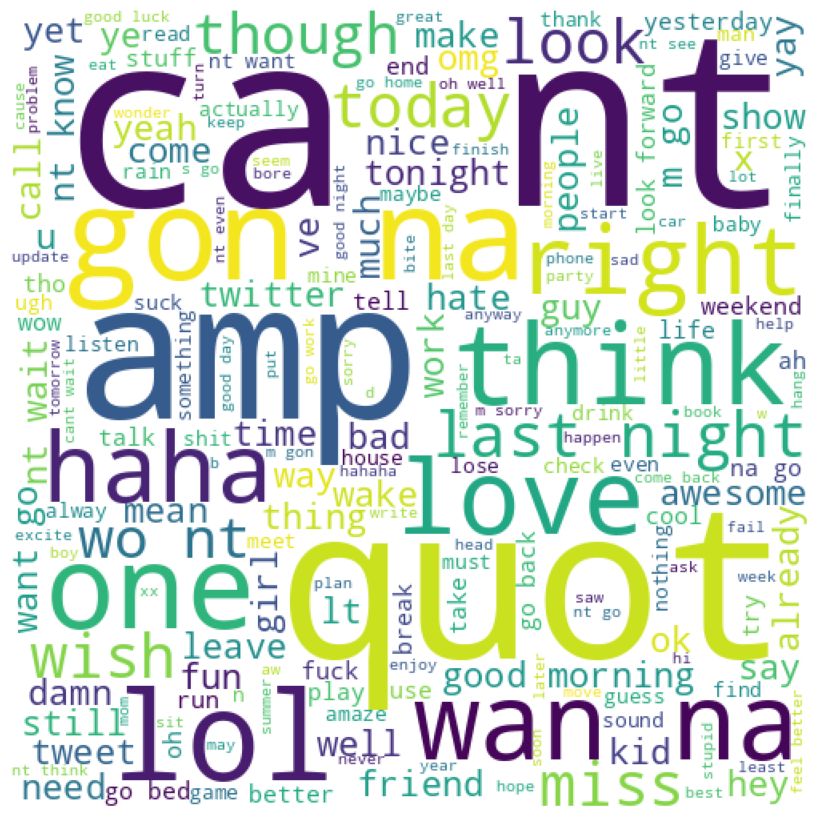

In [43]:
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [ ]:
from nltk.stem import WordNetLemmatizer


#lemmatize the tokens
wnl = WordNetLemmatizer()

wnl.lemmatize("going", pos = "v")

#wnl.lemmatize(word, pos = "n") for word in verb_lemmatize_words]

In [ ]:
print(stopwords.words('english'))

# CHECK WORDS WITH LESS OR EQUAL TO LENGTH 2

In [ ]:
unique_word_count = Counter(full_tokenized_words)
unique_word_count

In [ ]:
list_short_words = []

for key, value in unique_word_count.items():
    if len(key) <= 4:
        list_short_words.append(key)

In [ ]:
df = pd.DataFrame(list_short_words, columns=['Short Words'])
pd.set_option('display.max_rows', None)
display(df[968:])

In [ ]:
len(list_short_words)

In [ ]:
toll

In [ ]:
full_dataset[full_dataset['clean_text'].str.contains(' maya ')].head()

# DEEPER CLEANING

In [54]:
import re


def deeper_cleaning(sentence):
    # Stripping white spaces
    sentence = sentence.strip()

    substitute_words = {
        'ppl': 'people',
        'yr': 'year',
        'wnt': 'want',
        'wana': 'want',
        'al': 'all',
        'qrt': 'quarter',
        'tmrw': 'tomorrow',
        'gon na': 'going to',
        'goto': 'go',
        'bcoz': 'because',
        'wat': 'what',
        'idk': 'know'
    }

    # Replace abbreviations with full words
    for key, value in substitute_words.items():
        sentence = re.sub(r'\b' + re.escape(key) + r'\b', value, sentence)

    # List of standalone characters/words to remove
    standalone_characters = [
        's', 'm', 'que', 'ua', 'ca nt', 'amp', 've', 'do', 'wo nt', 'b', 'gmt',
        'wan', 'le', 'bgs', 'ton', 're', 'po', 'ta', 'd', 'hm', 'sd', 'p', 'mo',
        'fn', 'em', 'dis', 'ur', 'tw', 'quot', 'rd', 'mea', 'n', 'imma', 'th', 'as', 'g', 'gr',
        'ho', 'co', 'nin', 'qc', 'ttsc', 'o', 'e', 'x', 'nd', 'tel', 'gt',
        'db', 'ml', 'su', 'f', 'xblm', 'du', 'stou', 'gg', 'mt', 'll', 'jst', 'iz', 'ttb', 'isnt', 'bmar',
        'nwo', 'il', 'tp', 'dnf', 'ftf', 'anwb', 'odst', 'midv', 'mqu', 'gng', 'rily', 'muir', 'mtva', 'q', 'pa', 'we', 'ip', 'wme', 'l', 'rt', 'to', 'h', 'wwi', 'ms',
        'gi', 'bt', 'wk', 'da', 'an', 'shes', 'fe', 'tr', 'ch', 'c', 'mmc', 'bcd', 'i', 'non', 'teef', 'rly', 'be', 'z',
        'ti', 'ob', 'gyro', 'au', 'tt', 'dnt', 'cert', 'bd', 'gd', 'unc', 'mir', 'neei', 'se', 'he', 'bol', 'cc', 'ck', 'todo', 'sf', 'cnt', 'mn', 'suks', 'knw', 'xd', 'xx', 'wmy', 'anit', 'kiya', 'nahi', 'baad', 'tu', 'dekh', 'raha', 'hoga',
        'emir', 'naar', 'woe', 'mau', 'jln', 'jg', 'kau', 'ot', 'maya', 'ivf'
    ]

    # Create regex pattern to match all standalone characters
    pattern = r'\b(' + '|'.join(map(re.escape, standalone_characters)) + r')\b'

    # Remove standalone characters
    sentence = re.sub(pattern, '', sentence).strip()

    return sentence

In [55]:
full_dataset['clean_text'] = full_dataset['clean_text'].apply(deeper_cleaning)

In [56]:
#file_path = '../raw_data/full_dataset.csv'
#full_dataset.to_csv(file_path, index=False, encoding='latin1')

In [57]:
full_dataset = pd.read_csv('../raw_data/full_dataset.csv', encoding='latin1')
full_dataset

,Target,Id,Time_Tweet,NO_QUERY,User,Tweet,clean_text,tweet_len,clean_len
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,upset update facebook texting might cry resu...,111,76.0
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,dive many time ball manage save rest go bound,89,45.0
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,whole body feel itchy like fire,47,31.0
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",behave mad see,111,24.0
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew,whole crew,29,10.0
...,...,...,...,...,...,...,...,...,...
1592254,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...,wake school best feel ever,56,26.0
1592255,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...,thewdbcom cool hear old walt interview httpbli...,81,53.0
1592256,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...,ready mojo makeover ask detail,57,30.0
1592257,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...,happy birthday boo all time tupac amaru shakur,65,48.0


In [58]:
full_dataset.dropna(subset=['clean_text'], inplace=True)

In [59]:
from collections import Counter

#tokenize every sentence meaning every row in the dataframe
full_tokenized_sentences = full_dataset.clean_text.apply(lambda x: x.split())

#tokenize every word in every sentence - every word not unique
full_tokenized_words = [word for tokens in full_tokenized_sentences for word in tokens]

In [60]:
def cloud_string(tokenized_words, batch_size=100):
    
    comment_words = ''

    total_processed = 0

    for i in range(0, len(tokenized_words), batch_size):
        start = i
        end = min(i + batch_size, len(tokenized_words))
        batch_data = tokenized_words[start:end]

        comment_words += ' '.join(batch_data)+' '

        total_processed += len(batch_data)

        if total_processed >= 1_000_000:
            print(f"✅ Processed {total_processed} words")
    
    print("🥳 string with words completed.")
    return comment_words

In [61]:
word_cloud_string = cloud_string(full_tokenized_words, batch_size=10000)

✅ Processed 1000000 words
✅ Processed 1010000 words
✅ Processed 1020000 words
✅ Processed 1030000 words
✅ Processed 1040000 words
✅ Processed 1050000 words
✅ Processed 1060000 words
✅ Processed 1070000 words
✅ Processed 1080000 words
✅ Processed 1090000 words
✅ Processed 1100000 words
✅ Processed 1110000 words
✅ Processed 1120000 words
✅ Processed 1130000 words
✅ Processed 1140000 words
✅ Processed 1150000 words
✅ Processed 1160000 words
✅ Processed 1170000 words
✅ Processed 1180000 words
✅ Processed 1190000 words
✅ Processed 1200000 words
✅ Processed 1210000 words
✅ Processed 1220000 words
✅ Processed 1230000 words
✅ Processed 1240000 words
✅ Processed 1250000 words
✅ Processed 1260000 words
✅ Processed 1270000 words
✅ Processed 1280000 words
✅ Processed 1290000 words
✅ Processed 1300000 words
✅ Processed 1310000 words
✅ Processed 1320000 words
✅ Processed 1330000 words
✅ Processed 1340000 words
✅ Processed 1350000 words
✅ Processed 1360000 words
✅ Processed 1370000 words
✅ Processed 

✅ Processed 7360000 words
✅ Processed 7370000 words
✅ Processed 7380000 words
✅ Processed 7390000 words
✅ Processed 7400000 words
✅ Processed 7410000 words
✅ Processed 7420000 words
✅ Processed 7430000 words
✅ Processed 7440000 words
✅ Processed 7450000 words
✅ Processed 7460000 words
✅ Processed 7470000 words
✅ Processed 7480000 words
✅ Processed 7490000 words
✅ Processed 7500000 words
✅ Processed 7510000 words
✅ Processed 7520000 words
✅ Processed 7530000 words
✅ Processed 7540000 words
✅ Processed 7550000 words
✅ Processed 7560000 words
✅ Processed 7570000 words
✅ Processed 7580000 words
✅ Processed 7590000 words
✅ Processed 7600000 words
✅ Processed 7610000 words
✅ Processed 7620000 words
✅ Processed 7630000 words
✅ Processed 7640000 words
✅ Processed 7650000 words
✅ Processed 7660000 words
✅ Processed 7670000 words
✅ Processed 7680000 words
✅ Processed 7690000 words
✅ Processed 7700000 words
✅ Processed 7710000 words
✅ Processed 7720000 words
✅ Processed 7730000 words
✅ Processed 

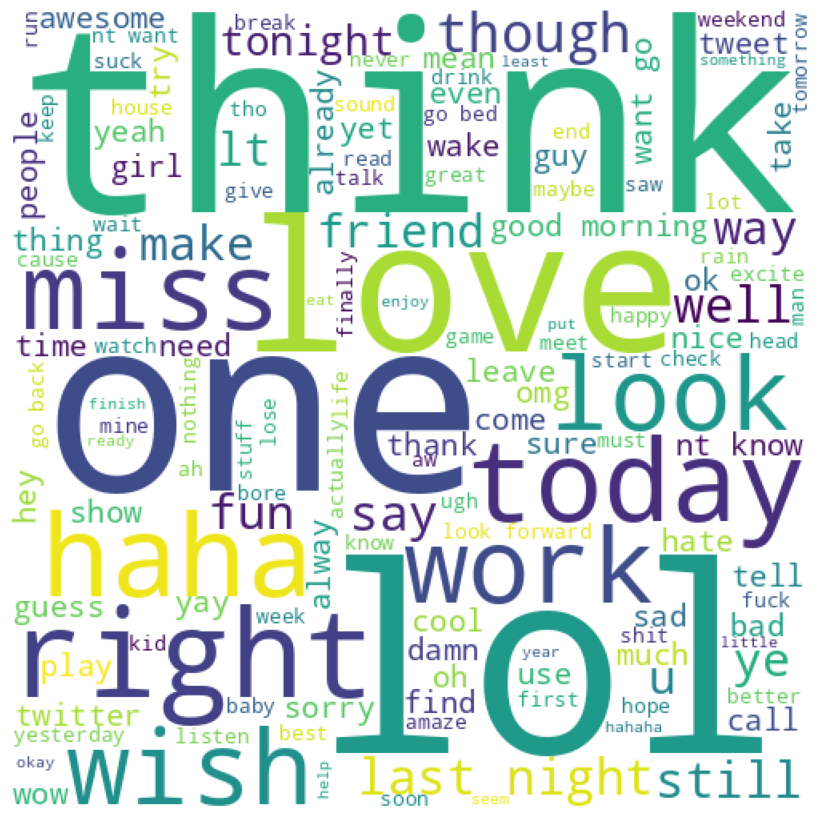

In [62]:
from wordcloud import WordCloud

wordcloud = WordCloud(width = 500, height = 500,
                background_color ='white',
                min_font_size = 10).generate(word_cloud_string)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [63]:
full_dataset[full_dataset['clean_text'].str.contains('idk')].head()

,Target,Id,Time_Tweet,NO_QUERY,User,Tweet,clean_text,tweet_len,clean_len
8612,0,1548305397,Fri Apr 17 20:35:25 PDT 2009,NO_QUERY,latinluvly,@MrzEndy IDK-y!! He doesn't like them!! (frown...,idky nt like frown,51,18.0
15773,0,1554522420,Sat Apr 18 17:13:37 PDT 2009,NO_QUERY,JJG09,Just got out of work...ready to do something f...,get work ready something fun tonight idkk yet,76,46.0
52705,0,1679947424,Sat May 02 10:32:57 PDT 2009,NO_QUERY,DjSensaitian,@loveemetwotimes idkk..but i think i came clos...,idkk think come close gettin trouble law firs...,111,62.0
67880,0,1692709573,Sun May 03 20:36:03 PDT 2009,NO_QUERY,MarcoDarko,"It seems that the tidkeeps on rolling in, no m...",seem tidkeeps roll matter much sorry,98,38.0
129952,0,1835327273,Mon May 18 05:43:54 PDT 2009,NO_QUERY,Naimahkinz,"@TheRealArsenix IdkK LOL. I luv my celts, n I ...",idkk lol luv celt nt na desert gosh darnit ...,105,63.0


## TRY GRID SEARCH  - GENSIM

In [69]:
#!pip install --upgrade gensim


In [75]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from itertools import combinations
from collections import Counter
import matplotlib.pyplot as plt
import math

calculate NPMI - Normalized Pointwise Mutual Information - determine association between 2 words in a corpus - high score means words are correlated and topics are coherent

$$
\text{PMI}(w_i, w_j) = \log \frac{P(w_i, w_j)}{P(w_i) P(w_j)}
$$

### CALCULATE NPMI

### DEFINE BATCH SIZE AND TOKENIZE CLEAN DATA

# LDA 2ND ITERATION

In [ ]:
cleaned_twitter_final_data.isnull().sum()

## Vectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
"""with TfidfVectorizer the vectorization is weighted as opposed to counted,
giving better visuals on how each topic weights in terms of full corpus

Term Frequency: Measures the frequency of a word in a document.
It increases with the number of occurrences of that word within the document.

Inverse Document Frequency: Measures how important a word is across all documents in the corpus.
It decreases the weight of words that occur frequently across all documents and increases the weight of terms that
occur rarely."""

In [ ]:
cleaned_twitter_final_data

In [ ]:
#vectorizer = TfidfVectorizer(ngram_range = (1, 2), min_df=700, max_features=5000)

In [ ]:
#vectorized_clean_text = vectorizer.fit_transform(cleaned_twitter_final_data['clean_text'])

In [ ]:
"""import pandas as pd
from scipy.sparse import csr_matrix

def convert_to_dataframe(matrix, vectorizer):
    if not isinstance(matrix, csr_matrix):
        matrix = csr_matrix(matrix)

    # Retrieve feature names from the vectorizer
    feature_names = vectorizer.get_feature_names_out()

    # Create DataFrame with sparse matrix and feature names as columns
    df = pd.DataFrame.sparse.from_spmatrix(matrix, columns=feature_names)

    return df

vectorized_clean_text_df = convert_to_dataframe(vectorized_clean_text, vectorizer)"""

In [ ]:
#vectorized_clean_text_df

In [ ]:
"""import pickle

# Export Pipeline as pickle file
with open("vectorizer_first.pkl", "wb") as file:
    pickle.dump(vectorizer, file)"""

In [ ]:
"""vectorized_clean_text = pd.DataFrame(
    vectorized_clean_text.toarray(),
    columns = vectorizer.get_feature_names_out())"""

## LDA MODEL

In [ ]:
#n_components = 20

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation


#lda_model = LatentDirichletAllocation(n_components=n_components, max_iter = 100, batch_size=1000)

In [ ]:
"""def fit_lda_model(vectorized_clean_text, batch_size=100, n_components=30, max_iter=50):
    total_samples = vectorized_clean_text.shape[0]
    n_batches = total_samples // batch_size

    lda_model = LatentDirichletAllocation(n_components=n_components, max_iter=max_iter)

    total_processed = 0  # Track total rows processed across batches

    for i in range(0, total_samples, batch_size):
        start = i
        end = min(i + batch_size, total_samples)
        batch_data = vectorized_clean_text[start:end]

        lda_model.partial_fit(batch_data)

        # Update the total number of rows processed
        total_processed += len(batch_data)

        # Check if we have processed at least 10,000 rows in total
        if total_processed >= 10000:
            print(f"✅ Processed {total_processed} rows")
            total_processed = 0  # Reset the counter

    print("LDA fitting completed.")
    return lda_model
"""

In [ ]:
#lda_model = fit_lda_model(vectorized_clean_text_df, batch_size=100, n_components=30, max_iter=100)

In [ ]:
"""import pickle 

# Export LDA model as pickle file
with open("lda_model_first.pkl", "wb") as file:
    pickle.dump(lda_model, file)"""

In [ ]:
import numpy as np

In [ ]:
import pickle 

#first LDA model
with open('../model_small/vectorizer.pkl', 'rb') as pickle_file:
    vectorizer = pickle.load(pickle_file)
    
vectorizer

In [ ]:
'''Installing collected packages: numpy, scipy
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: scipy
    Found existing installation: scipy 1.12.0
    Uninstalling scipy-1.12.0:
      Successfully uninstalled scipy-1.12.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
transformers 4.42.4 requires numpy<2.0,>=1.17, but you have numpy 2.0.0 which is incompatible.
Successfully installed numpy-2.0.0 scipy-1.14.0'''

In [ ]:
#first LDA model
import pickle 

with open('../model_small/lda_model.pkl', 'rb') as pickle_file:
    lda_model = pickle.load(pickle_file)
    
lda_model

## FIRST LDA MODEL AND VECTORIZER

In [94]:
import pickle 

#first LDA model, second iteration - imcompatibility between packages - redid with same params
with open('../model_small/lda_model_first.pkl', 'rb') as pickle_file:
    lda_model_first = pickle.load(pickle_file)
    
lda_model_first

LatentDirichletAllocation(max_iter=100, n_components=30)

In [95]:
#first vectorizer, second iteration - imcompatibility between packages - redid with same params
with open('../model_small/vectorizer_first.pkl', 'rb') as pickle_file:
    vectorizer_first = pickle.load(pickle_file)
    
vectorizer_first

TfidfVectorizer(max_features=5000, min_df=700, ngram_range=(1, 2))

In [104]:
def print_topics(model, vectorizer):
    for idx, topic in enumerate(model.components_):
        print("Topic %d:" % (idx))
        print([(vectorizer.get_feature_names_out()[i], topic[i])
                        for i in topic.argsort()[:-10 - 1:-1]])
print_topics(lda_model_first, vectorizer_first)

Topic 0:
[('thank', 11606.101629690675), ('always', 5069.501776850059), ('let', 4923.822325218837), ('people', 3746.7220121577548), ('vote', 2814.4636009472842), ('know', 2703.5152847145287), ('let know', 2138.1074065840894), ('share', 2085.014137261635), ('believe', 1981.5138556665233), ('care', 1977.133543893399)]
Topic 1:
[('check', 5367.310231601746), ('new', 4275.0281097286115), ('pay', 4176.501159879507), ('ur', 3494.6592319310344), ('get follower', 3408.6353905017577), ('think', 3214.43278940229), ('book', 2488.0625700537857), ('mine', 2144.3912930852375), ('class', 2110.5422551418596), ('though', 1804.155826893804)]
Topic 2:
[('follow', 6964.084782662343), ('night', 6109.450953472977), ('last', 4118.108750491922), ('http', 3379.1760913577123), ('call', 3251.6571910494463), ('soon', 2859.7736320578842), ('last night', 2821.0867558648033), ('lovely', 2431.5049981586035), ('rock', 1950.8128547124336), ('saturday', 1568.955622433102)]
Topic 3:
[('read', 5356.975465682239), ('pic', 

In [ ]:
first_vectorized_clean_text = vectorizer_first.transform(cleaned_twitter_final_data['clean_text'])

In [ ]:
import pandas as pd
from scipy.sparse import csr_matrix

def convert_to_dataframe(matrix, vectorizer):
    if not isinstance(matrix, csr_matrix):
        matrix = csr_matrix(matrix)

    # Retrieve feature names from the vectorizer
    feature_names = vectorizer.get_feature_names_out()

    # Create DataFrame with sparse matrix and feature names as columns
    df = pd.DataFrame.sparse.from_spmatrix(matrix, columns=feature_names)

    return df

first_vectorized_clean_text_df = convert_to_dataframe(first_vectorized_clean_text, vectorizer_first)
first_vectorized_clean_text_df

In [ ]:
document_mixture_first = lda_model_first.transform(first_vectorized_clean_text)
document_mixture_first

In [ ]:
a = document_mixture_first.shape[0]
b = cleaned_twitter_final_data.shape[0]
assert a == b

In [ ]:
cleaned_twitter_final_data['(1) most_important_topic'] = np.argmax(document_mixture_first, axis = 1)

In [ ]:
def topic_word(vectorizer_first, model, topic, topwords, with_weights = True):
    topwords_indexes = topic.argsort()[:-topwords - 1:-1]
    if with_weights == True:
        topwords = [(vectorizer_first.get_feature_names_out()[i], round(topic[i],2)) for i in topwords_indexes]
    if with_weights == False:
        topwords = [vectorizer_first.get_feature_names_out()[i] for i in topwords_indexes]
    return topwords


def print_topics(vectorizer_first, model, topwords):
    for idx, topic in enumerate(model.components_):
        print("-"*20)
        print("Topic %d:" % (idx))
        print(topic_word(vectorizer_first, model, topic, topwords))
        
print_topics(vectorizer_first, lda_model_first, topwords = 10)

In [ ]:
topic_word_mixture_first = [topic_word(vectorizer_first, lda_model_first, topic, topwords = 10, with_weights = False)
                      for topic in lda_model_first.components_]
topic_word_mixture_first

In [ ]:
cleaned_twitter_final_data['1 - most_important_words'] = cleaned_twitter_final_data['(1) most_important_topic'].apply(lambda i: topic_word_mixture_first[i])

In [ ]:
cleaned_twitter_final_data

## SECOND LDA MODEL AND VECTORIZER

In [102]:
#second LDA model
with open('lda_model_50_bigrams_trigrams_unigrams.pkl', 'rb') as pickle_file:
    lda_model_second = pickle.load(pickle_file)
    
lda_model_second

LatentDirichletAllocation(max_iter=100, n_components=50)

In [103]:
#second vectorizer
with open('vectorizer_bigrams_trigrams_unigrams.pkl', 'rb') as pickle_file:
    vectorizer_second = pickle.load(pickle_file)
    
vectorizer_second

TfidfVectorizer(max_features=5000, min_df=200, ngram_range=(1, 3))

In [ ]:
def print_topics(model, vectorizer):
    for idx, topic in enumerate(model.components_):
        print("Topic %d:" % (idx))
        print([(vectorizer.get_feature_names_out()[i], topic[i])
                        for i in topic.argsort()[:-10 - 1:-1]])
print_topics(lda_model_second, vectorizer_second)

## THIRD LDA MODEL AND VECTORIZER

In [ ]:
#second LDA model
with open('lda_model_60_bigrams_trigrams_unigrams.pkl', 'rb') as pickle_file:
    lda_model_third = pickle.load(pickle_file)
    
lda_model_third

In [ ]:
#second vectorizer
with open('vectorizer_7000_50_bigrams_trigrams_unigrams.pkl', 'rb') as pickle_file:
    vectorizer_third = pickle.load(pickle_file)
    
vectorizer_third

# USER INPUT FUNCTION

In [97]:
import re
import string
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from textblob import TextBlob
import unicodedata


def preprocessing(sentence):

    #correct grammar
    blob = TextBlob(sentence)
    sentence = str(blob.correct())

    #remove white spaces
    sentence = sentence.strip()

    #lower the characters
    sentence = sentence.lower()

    #remove unique characters
    sentence = sentence.replace('½', 'half')

    #remove numbers
    sentence = re.sub(r'\b\d+\b', '', sentence)

    # Normalize the text to remove accents and normalize forms
    sentence = unicodedata.normalize('NFD', sentence).encode('ascii', 'ignore').decode('utf-8')

    # Remove remaining non-ASCII characters
    sentence = re.sub(r'[^\x00-\x7F]+', ' ', sentence)

    #remove emails
    email_pattern = r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b'
    sentence = re.sub(email_pattern, '', sentence)

    #remove twitter handles
    handle_pattern = r'@\w+'
    sentence = re.sub(handle_pattern, '', sentence)

    #remove twitter emoticons
    emoticon_pattern = r'[:;=8][\-o\*\']?[\)\]\(\[dDpP/:}{@|\\]'
    sentence = re.sub(emoticon_pattern, '', sentence)

    #remove websites
    url_pattern = r'https?://\S+|www\.\S+'
    sentence = re.sub(url_pattern, '', sentence)

    #remove numbers
    sentence = ''.join(char for char in sentence if not char.isdigit())

    #tokenize sentence
    tokens = word_tokenize(sentence)

    #remove stop words
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]

    # Remove punctuation
    filtered_tokens = [''.join([c for c in word if c not in string.punctuation]) for word in filtered_tokens if word not in string.punctuation]

    #repeated characters
    pattern = re.compile(r"(.)\1{2,}")
    filtered_tokens = [pattern.sub(r"\1", word) for word in filtered_tokens]

    #lemmatize the tokens
    wnl = WordNetLemmatizer()
    #iterate with lemmatizer for verbs
    verb_lemmatize_words = [wnl.lemmatize(word, pos = "v") for word in filtered_tokens]
    #iterate with lemmatizer for nouns
    noun_lemmatize_words = [wnl.lemmatize(word, pos = "n") for word in verb_lemmatize_words]

    #join tokens
    sentence = ' '.join(noun_lemmatize_words)
    return sentence

In [ ]:
len('My day was stressfull however i am happy that the machine learning model is performing better than it was before!!!!')

# FIRST MODEL TOP 5 WORDS FROM MOST RELEVANT TOPIC

In [101]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

import numpy as np

top_words_list = []
#top_5_words_from_top_topics = top_words_list[0]

def pre_process_user_input(sentence):
    #clean
    processed_sentence = preprocessing(sentence)

    # Vectorize the user input
    vectorized_input = vectorizer_first.transform([processed_sentence])

    # Predict the topic distribution for the vectorized input
    topic_distribution = lda_model_first.transform(vectorized_input)

    # Find the index of the most probable topic
    most_likely_topic_index = np.argmax(topic_distribution)

    # Get the top words for the most probable topic
    top_words_indices = lda_model_first.components_[most_likely_topic_index].argsort()[:-10 - 1:-1]
    top_words = [vectorizer_first.get_feature_names_out()[i] for i in top_words_indices]
    top_words_list.append(top_words[0:])
    return top_words_list

user_input = pre_process_user_input('idk how the model is performing')
print(user_input)

[['wait', 'ca', 'ca nt', 'nt', 'something', 'weekend', 'nt wait', 'see', 'must', 'lunch']]


In [ ]:
 ['awesome',
  'get',
  'love',
  'guy',
  'good',
  'lt',
  'go',
  'amaze',
  'thank',
  'excite'],
    
    #output for the same user input has changed after creating another pickle file

#  SECOND MODEL TOP 5 WORDS FROM MOST RELEVANT TOPIC

In [ ]:
top_words_list = []
#top_5_words_from_top_topics = top_words_list[0]

def pre_process_user_input(sentence):
    #clean
    processed_sentence = preprocessing(sentence)

    # Vectorize the user input
    vectorized_input = vectorizer_second.transform([processed_sentence])

    # Predict the topic distribution for the vectorized input
    topic_distribution = lda_model_second.transform(vectorized_input)

    # Find the index of the most probable topic
    most_likely_topic_index = np.argmax(topic_distribution)

    # Get the top words for the most probable topic
    top_words_indices = lda_model_second.components_[most_likely_topic_index].argsort()[:-10 - 1:-1]
    top_words = [vectorizer_second.get_feature_names_out()[i] for i in top_words_indices]
    top_words_list.append(top_words[0:])
    return top_words_list

user_input = pre_process_user_input('My day was stressfull however i am happy that the machine learning model is performing better than it was before!!!!')
print(user_input)

#  THIRD MODEL TOP 5 WORDS FROM MOST RELEVANT TOPIC

In [ ]:
top_words_list = []
#top_5_words_from_top_topics = top_words_list[0]

def pre_process_user_input(sentence):
    #clean
    processed_sentence = preprocessing(sentence)

    # Vectorize the user input
    vectorized_input = vectorizer_third.transform([processed_sentence])

    # Predict the topic distribution for the vectorized input
    topic_distribution = lda_model_third.transform(vectorized_input)

    # Find the index of the most probable topic
    most_likely_topic_index = np.argmax(topic_distribution)

    # Get the top words for the most probable topic
    top_words_indices = lda_model_third.components_[most_likely_topic_index].argsort()[:-10 - 1:-1]
    top_words = [vectorizer_third.get_feature_names_out()[i] for i in top_words_indices]
    top_words_list.append(top_words[0:])
    return top_words_list

user_input = pre_process_user_input('My day was stressfull however i am happy that the machine learning model is performing better than it was before!!!!')
print(user_input)

# NEW LDA LOGIC

In [ ]:
# get weights of user input

## GETTING FOR THE FIRST MODEL

In [105]:
def pre_process_user_input(sentence, vectorizer_first, lda_model_first, n_top_words=5):
    # Clean the input
    processed_sentence = preprocessing(sentence)

    # Vectorize the user input using TF-IDF
    vectorized_input = vectorizer_first.transform([processed_sentence])

    # Calculate the importance of each word in the input
    features = np.array(vectorizer_first.get_feature_names_out())
    sorting = np.argsort(vectorized_input.toarray()).flatten()[::-1]

    # Get the top n words based on their TF-IDF weights
    top_n_words = features[sorting][:n_top_words]

    return top_n_words

# Example usage:
sentence = 'My day was stressful however I am happy that the machine learning model is performing better than it was before!!!!'

# Call the function
top_words = pre_process_user_input(sentence, vectorizer_first, lda_model_first)
print(top_words)

['model' 'machine' 'however' 'learn' 'happy']


## GETTING FOR THE SECOND MODEL

In [ ]:
def pre_process_user_input(sentence, vectorizer_second, lda_model_second, n_top_words=5):
    # Clean the input
    processed_sentence = preprocessing(sentence)

    # Vectorize the user input using TF-IDF
    vectorized_input = vectorizer_second.transform([processed_sentence])

    # Calculate the importance of each word in the input
    features = np.array(vectorizer_second.get_feature_names_out())
    sorting = np.argsort(vectorized_input.toarray()).flatten()[::-1]

    # Get the top n words based on their TF-IDF weights
    top_n_words = features[sorting][:n_top_words]

    return top_n_words

# Example usage:
sentence = 'My day was stressful however I am happy that the machine learning model is performing better than it was before!!!!'

# Call the function
top_words = pre_process_user_input(sentence, vectorizer_second, lda_model_second)
print(top_words)

## GETTING FOR THE THIRD MODEL

In [ ]:
def pre_process_user_input(sentence, vectorizer_third, lda_model_third, n_top_words=5):
    # Clean the input
    processed_sentence = preprocessing(sentence)

    # Vectorize the user input using TF-IDF
    vectorized_input = vectorizer_third.transform([processed_sentence])

    # Calculate the importance of each word in the input
    features = np.array(vectorizer_third.get_feature_names_out())
    sorting = np.argsort(vectorized_input.toarray()).flatten()[::-1]

    # Get the top n words based on their TF-IDF weights
    top_n_words = features[sorting][:n_top_words]

    return top_n_words

# Example usage:
sentence = 'My day was stressful however I am happy that the machine learning model is performing better than it was before!!!!'

# Call the function
top_words = pre_process_user_input(sentence, vectorizer_third, lda_model_third)
print(top_words)

# CLEANING DATA KEEPING STOP WORDS

In [ ]:
import re
import string
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from textblob import TextBlob
import unicodedata


def preprocessing_stop(sentence):

    #correct grammar
    #blob = TextBlob(sentence)
    #sentence = str(blob.correct())

    #remove white spaces
    sentence = sentence.strip()

    #lower the characters
    sentence = sentence.lower()

    #remove unique characters
    sentence = sentence.replace('½', 'half')

    #remove numbers
    sentence = re.sub(r'\b\d+\b', '', sentence)

    # Normalize the text to remove accents and normalize forms
    sentence = unicodedata.normalize('NFD', sentence).encode('ascii', 'ignore').decode('utf-8')

    # Remove remaining non-ASCII characters
    sentence = re.sub(r'[^\x00-\x7F]+', ' ', sentence)

    #remove emails
    email_pattern = r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b'
    sentence = re.sub(email_pattern, '', sentence)

    #remove twitter handles
    handle_pattern = r'@\w+'
    sentence = re.sub(handle_pattern, '', sentence)

    #remove twitter emoticons
    emoticon_pattern = r'[:;=8][\-o\*\']?[\)\]\(\[dDpP/:}{@|\\]'
    sentence = re.sub(emoticon_pattern, '', sentence)

    #remove websites
    url_pattern = r'https?://\S+|www\.\S+'
    sentence = re.sub(url_pattern, '', sentence)

    #remove numbers
    sentence = ''.join(char for char in sentence if not char.isdigit())

    #tokenize sentence
    tokens = word_tokenize(sentence)

    #remove stop words
    #stop_words = set(stopwords.words('english'))
    #filtered_tokens = [word for word in tokens if word not in stop_words]

    # Remove punctuation
    filtered_tokens = [''.join([c for c in word if c not in string.punctuation]) for word in tokens if word not in string.punctuation]

    #repeated characters
    pattern = re.compile(r"(.)\1{2,}")
    filtered_tokens = [pattern.sub(r"\1", word) for word in filtered_tokens]

    #lemmatize the tokens
    wnl = WordNetLemmatizer()
    #iterate with lemmatizer for verbs
    verb_lemmatize_words = [wnl.lemmatize(word, pos = "v") for word in filtered_tokens]
    #iterate with lemmatizer for nouns
    noun_lemmatize_words = [wnl.lemmatize(word, pos = "n") for word in verb_lemmatize_words]

    #join tokens
    sentence = ' '.join(noun_lemmatize_words)
    return sentence